## TP2 - Léa Heiniger

In [1]:
## Imports
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt

### PART 1 - Monday, October 3, 2022

In [2]:
def read_input(filename):
    # TODO
    '''
    read .dat file and return n, D, and W

    Parameters:
    -----------
    filename

    Returns:
    --------
    n: number of facilities
    D: Distance Matrix
    W: Weight Matrix
    '''
    linesNB = []
    with open(filename, 'r') as data :
        for l in data :
            line = l.rstrip()
            if line :
                linesNB.append(line)
    
    n = int(linesNB[0])
    D = np.matrix(';'.join(linesNB[1:n+1]))
    W = np.matrix(';'.join(linesNB[n+1:]))
    
    return n,D,W                    
            

In [3]:
# get n (number of locations, facilities), D (Distance Matrix), and W (Weights/Flows Matrix)
n, D, W = read_input(filename='1.dat')


In [4]:
def compute_I(combination):
    # TODO
    '''
    compute fitness of a combination

    Parameters:
    -----------
    combination : list of facilities' assignment

    Returns:
    --------
    I: fitness score
    '''
    I = 0
    for i in range(len(combination)) :
        for j in range(i,len(combination)) :
            distance = D[i,j]
            weight = W[combination[i],combination[j]]
            I += (distance*weight)
        
    I *= 2
    return I

def compute_delta(combination, i, j):
    # TODO
    '''
    compute delta fitness after swapping facilities in locations i & j (ie. delta fitness for one neighbor)

    Parameters:
    -----------
    combination : list of original facilities' assignment
    i, j : locations of facilities being swapped

    Returns:
    --------
    delta_I: delta fitness
    '''
    delta_I = 0
    
    for k in range(len(combination)) :
        if k==i or k==j :
            continue
        wj = W[j,k]
        wi = W[i,k]
        
        dj = D[combination[j], combination[k]]
        di = D[combination[i], combination[k]]
        
        delta_I += ((wj-wi)*(di-dj))
            
    
    
    delta_I *= 2
    return -delta_I
    

def swap_two(combination, i, j):
    # TODO
    '''
    returns a new permutation with facilities in i & j swapped

    Parameters:
    -----------
    combination : list of original facilities' assignment
    i, j : locations of facilities being swapped

    Returns:
    --------
    neighbor : new permutation
    '''
    neighbor = combination.copy()
    neighbor[i],neighbor[j] = neighbor[j],neighbor[i]

    return neighbor
            
def is_tabu(tabu_list, combination, i, j):
    # TODO
    ## itr is optional, depends on how you implement the tabu matrix
    '''
    returns a boolean to check if swap is tabu

    Parameters:
    -----------
    tabu_list : tabu matrix with locationsxfacilities
    combination : list of original facilities' assignment (before swap)
    i, j : locations of facilities being swapped

    Returns:
    --------
    True : if swap is Tabu
    False : if swap is not Tabu
    '''

    if tabu_list[combination[i]][j]>0 or tabu_list[combination[j]][i]>0 :
        res = True
    else :
        res = False
    
    return res

def update_tabu(tabu_list, combination, i, j, tenure):
    # TODO
    ## itr is optional, depends on how you implement the tabu matrix
    '''
    updates the tabu_list (matrix)

    Parameters:
    -----------
    tabu_list : tabu matrix with locationsxfacilities
    combination : list of original facilities' assignment(before swap)
    i, j : locations of facilities being swapped
    tenure : tabu_list short term memory (l)
    '''
    for p in range(tabu_list.shape[0]):
        for q in range(tabu_list.shape[1]):
            if tabu_list[p][q] > 0 :
                tabu_list[p][q] -= 1
                
                
    tabu_list[combination[i]][i] = tenure
    tabu_list[combination[j]][j] = tenure
    
    return tabu_list
    
def filter_diversification(div_matrix, combination):
    # TODO
    '''
    returns a list of swaps that have not been set for the last n^2 iterations

    Parameters:
    -----------
    div_matrix : diversification matrix with locations facilities
    combination : list of original facilities' assignment (before swap)

    Returns:
    --------
    list of swaps that have not been set for the last n^2 iterations
    empty list if no such swap exists
    '''
    swaps = []
    for p in range(div_matrix.shape[0]) :
        for q in range(div_matrix.shape[1]) :
            if div_matrix[p][q] == n**2 :
                s = [combination[p], q]
                
                if tabu_list[combination[p]][q] == 0 :
                             swaps.append(s)
    return swaps

def update_diversification(div_matrix, combination, i, j):
    # TODO
    '''
    updates the diversification matrix after swapping facilities in locations i & j

    Parameters:
    -----------
    div_matrix : diversification matrix with locationsxfacilities
    combination : list of original facilities' assignment(before swap)
    i, j : locations of facilities being swapped
    '''
    for p in range(div_matrix.shape[0]):
        for q in range(div_matrix.shape[1]):
            if div_matrix[p][q] < n**2 :
                div_matrix[p][q] += 1
                
                
    div_matrix[combination[i]][j] = 0
    div_matrix[combination[j]][i] = 0
    
    return div_matrix

In [5]:
# TODO
'''Test the above functions, and show your results for eg. :
1. print outputs n, D, and W
2. show an example of a two-swap (show before & after lists)
3. initialize an empty tabu-list, perform a swap, update the tabu-list (matrix), and print it
4. test is_tabu fuction
5. initialize a diversification matrix with few zero items, and check filter_diversification function
6. test update_diversification matrix with a swap (print the matrix before and after the swap)'''

# 1.
print("n =",n)
print("D =",D)
print("W =",W)

print("\n------------------------------------------------------\n")
# 2.
# we create a random combination
combination = [p for p in range(n)]
random.shuffle(combination)

i = 3
j = 7
print("before swapping locations",i,"and", j," combination =",combination)
print("after swapping locations",i,"and", j," combination =",swap_two(combination,i,j))

print("\n------------------------------------------------------\n")
# 3.
tabu_list = np.zeros((n,n))
tenure = 10
print("Empty tabu_list :\n", tabu_list)
print("\nWe swap locations",i,"and", j,"in",combination,"and the tenure is",tenure)
print("\ntabu_list after the swap :\n", update_tabu(tabu_list, combination, i, j, tenure))


print("\n------------------------------------------------------\n")
# 4.
print("We check if the swap that we allready did is tabu : ",is_tabu(tabu_list, combination, i, j))
print("\nAnd if we try a swap that was not performed previously : " ,is_tabu(tabu_list, combination, 1, 2))

print("\n------------------------------------------------------\n")
# 5. + 6.
div_matrix = np.zeros((n,n))
print("Empty div_matrix :\n", div_matrix)
print("\nWe swap locations",i,"and", j,"in",combination)
div_matrix = update_diversification(div_matrix, combination, i, j)
print("\ndiv_matrix after the swap :\n", div_matrix)
print("\nWe run filter_diversification and we obtain the following list : \n",filter_diversification(div_matrix, combination))




n = 12
D = [[0 1 2 3 1 2 3 4 2 3 4 5]
 [1 0 1 2 2 1 2 3 3 2 3 4]
 [2 1 0 1 3 2 1 2 4 3 2 3]
 [3 2 1 0 4 3 2 1 5 4 3 2]
 [1 2 3 4 0 1 2 3 1 2 3 4]
 [2 1 2 3 1 0 1 2 2 1 2 3]
 [3 2 1 2 2 1 0 1 3 2 1 2]
 [4 3 2 1 3 2 1 0 4 3 2 1]
 [2 3 4 5 1 2 3 4 0 1 2 3]
 [3 2 3 4 2 1 2 3 1 0 1 2]
 [4 3 2 3 3 2 1 2 2 1 0 1]
 [5 4 3 2 4 3 2 1 3 2 1 0]]
W = [[ 0  5  2  4  1  0  0  6  2  1  1  1]
 [ 5  0  3  0  2  2  2  0  4  5  0  0]
 [ 2  3  0  0  0  0  0  5  5  2  2  2]
 [ 4  0  0  0  5  2  2 10  0  0  5  5]
 [ 1  2  0  5  0 10  0  0  0  5  1  1]
 [ 0  2  0  2 10  0  5  1  1  5  4  0]
 [ 0  2  0  2  0  5  0 10  5  2  3  3]
 [ 6  0  5 10  0  1 10  0  0  0  5  0]
 [ 2  4  5  0  0  1  5  0  0  0 10 10]
 [ 1  5  2  0  5  5  2  0  0  0  5  0]
 [ 1  0  2  5  1  4  3  5 10  5  0  2]
 [ 1  0  2  5  1  0  3  0 10  0  2  0]]

------------------------------------------------------

before swapping locations 3 and 7  combination = [2, 10, 9, 5, 1, 8, 0, 3, 7, 6, 4, 11]
after swapping locations 3 and 7  combination 

### PART 2 - Monday, October 10, 2022

In [6]:
def next_swap(tabu_list, combination):
    # TODO
    '''
    returns next best non-tabu swap

    Parameters:
    -----------
    tabu_list : tabu matrix with locationsxfacilities
    combination : list of original facilities' assignment

    Returns:
    --------
    (i, j) : new best non-tabu swap
    delta_fitness : delta_fitness of chosen best non-tabu swap (difference in fitness between original and new permutation)
    '''
    # we create a list of all non tabu swaps
    swaps = []
    for p in range(len(combination)) :
        for q in range(p+1,len(combination)) :
            if not(is_tabu(tabu_list,combination,p,q)) :
                 swaps.append([p,q])
    
    # we compute the deltas to find the best swap
    costs = [compute_delta(combination,s[0],s[1]) for s in swaps]
                 
    delta_fitness = np.min(costs)
    best_swap = swaps[costs.index(delta_fitness)]

    return (best_swap[0],best_swap[1]), delta_fitness
                 
    

In [7]:
def tabu_QAP(tenure, tmax, with_div=False):
    # TODO (refer to TabuSearch flow diagram)
    '''
    perform Tabu Search with/out diversification

    Parameters:
    -----------
    tenure : short-term memory (l)
    tmax : number of iterations
    with_div : True if with diversification, False if without (False by default here)

    Returns:
    --------
    global_I : global best seen fitness
    global_P : global best seen permutation
    '''
    combination = [l for l in range(n)]
    random.shuffle(combination)
    global_P = combination
    global_I = compute_I(global_P)
    tabu_list = np.zeros((n,n))
    if with_div :
        div_matrix = np.zeros((n,n))
    
    for _ in range(tmax) :
        
        if with_div :
            forced_swaps = filter_diversification(div_matrix, combination)
            
            if forced_swaps == [] :
                (i,j),delta_fitness = next_swap(tabu_list, combination)
                
            else : 
                s = random.choice(forced_swaps)
                i = s[0]
                j = s[1]
                delta_fitness = compute_delta(combination,i,j)
            
        else :
            (i,j),delta_fitness = next_swap(tabu_list, combination)
        
        # We update tabu_list and div_matrix if we use one
        tabu_list = update_tabu(tabu_list, combination, i, j, tenure)
    
        if with_div :
            div_matrix = update_diversification(div_matrix, combination, i, j)
        
        combination = swap_two(combination, i, j)
        
        if global_I > compute_I(combination) :
            global_P = combination.copy()
            global_I = compute_I(global_P)



    return global_I, global_P  


In [15]:
# TODO
''' Run your algorithm 10 times on the example provided with this exercise
(the ”1.dat” file) ; make sure that you start each iteration with a different
initial state. Vary the l parameter (tabu tenure) over {1, 0.5n, 0.9n} and
for each value of l report the best, the mean and the standard deviation of
the obtained values of I. For this problem check whether the diversification
mechanism helps '''

''' We expect to see graphs/tables showing the statistics for each method 
(with/out diversification), varying tenure, and tmax(optional)
'''

minimum = [[],[]]
mean = [[],[]]
standard_dev = [[],[]]
res = []
res_div = []

tmax = 100000
for tenure in [1, 0.5*n, 0.9*n] :    

    ## save fitness results to get statistics (minimum, mean, and standard deviation) for all 10 runs, for each method
    tabu_results = []
    tabu_div_results = []

    for _ in range(10):
        global_I, global_P = tabu_QAP(tenure, tmax)
        tabu_results.append(global_I)
        global_I_div, global_P_div = tabu_QAP(tenure, tmax, with_div=True)
        tabu_div_results.append(global_I_div)
        
    res.append(tabu_results)
    res_div.append(tabu_div_results)

      
    minimum[0].append(np.min(tabu_results))
    minimum[1].append(np.min(tabu_div_results))
    
    mean[0].append(np.mean(tabu_results))
    mean[1].append(np.mean(tabu_div_results))
    
    standard_dev[0].append(np.std(tabu_results))
    standard_dev[1].append(np.std(tabu_div_results))
    


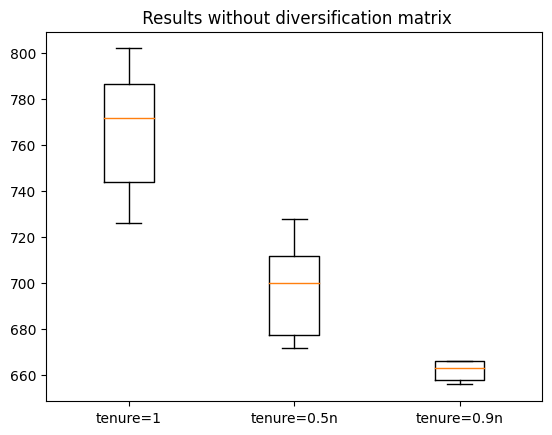

Minimum for each tenure : [726, 672, 656]
Mean for each tenure : [766.0, 699.0, 661.8]
Standard deviation for each tenure : [24.592681838303037, 20.75090359478353, 4.331281565541543]


In [16]:
tenure_1 = res[0]
tenure_05n = res[1]
tenure_09n = res[2]
columns = [tenure_1,tenure_05n, tenure_09n]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ["tenure=1", "tenure=0.5n", "tenure=0.9n"], rotation=0)
plt.title(" Results without diversification matrix")

plt.show()

print("Minimum for each tenure :", minimum[0])
print("Mean for each tenure :", mean[0])
print("Standard deviation for each tenure :", standard_dev[0])

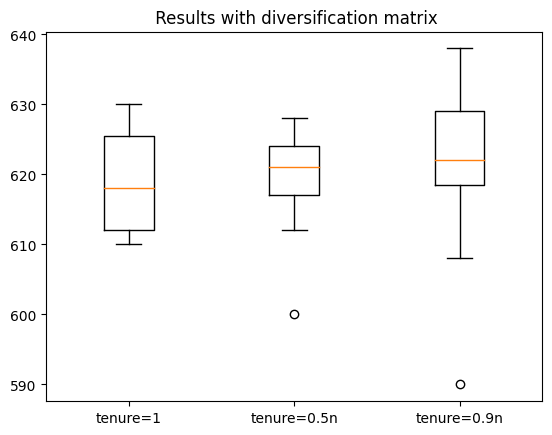

Minimum for each tenure : [610, 600, 590]
Mean for each tenure : [618.8, 619.0, 620.4]
Standard deviation for each tenure : [6.939740629158989, 7.655063683601855, 12.737346662472527]


In [17]:

tenure_1 = res_div[0]
tenure_05n = res_div[1]
tenure_09n = res_div[2]

columns = [tenure_1,tenure_05n, tenure_09n]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ["tenure=1", "tenure=0.5n", "tenure=0.9n"], rotation=0)
plt.title(" Results with diversification matrix")

plt.show()

print("Minimum for each tenure :", minimum[1])
print("Mean for each tenure :", mean[1])
print("Standard deviation for each tenure :", standard_dev[1])

In [18]:
# TODO
## OPTIONAL !
'''Randomly generate 4 QAPs problems (i.e. symmetrical distance 
and weight matrices) of size n = {40, 50, 80, 100}. 
Fix l = 0.5n and run your algorithm 10 times on these problems. 
Report mean and standard deviation of the obtained values of I. 
Here it is up to you to decide whether to use the diversification mechanism'''

'Randomly generate 4 QAPs problems (i.e. symmetrical distance \nand weight matrices) of size n = {40, 50, 80, 100}. \nFix l = 0.5n and run your algorithm 10 times on these problems. \nReport mean and standard deviation of the obtained values of I. \nHere it is up to you to decide whether to use the diversification mechanism'

Answer the following Questions: 

1.  Q: In this specific case, what is the neighborhood of an element of the research space?

    A: The neighborhood is all the combination that only have a swap of two locations as difference with our curent combination


2.  Q: In terms of $n$ (number of locations/facilities), what is the size of the neighborhood? (i.e., how many neighbors does each         permuation have?)

    A: The neighborhood for $n$ locations is of size $\frac{n(n-1)}{2}$ so the complexity is $O(n^{2})$
